In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import os

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

Using TensorFlow backend.


87916544/87910968 [==============================] - 20s 0us/step


In [6]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
from os import path
from datetime import  datetime
import tensorflow
import keras

In [7]:
os.getcwd()

'/floyd/home'

In [9]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

file_path = '/floyd/input/cxr'
os.path.exists(file_path)
impagefile1 = 'floyd/input/cxr/00000001_000.png'

####
imagefile = glob.glob('/floyd/input/cxr/*.png')

# print(imagefile) too big to print
newpath = os.path.join(file_path, '*.png')

os.path.exists(newpath)

False

Scans found: 112120 , Total Headers 112120
All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Normal', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
Atelectasis
Cardiomegaly
Consolidation
Edema
Effusion
Emphysema
Fibrosis
Hernia
Infiltration
Mass
Nodule
Normal
Pleural_Thickening
Pneumonia
Pneumothorax


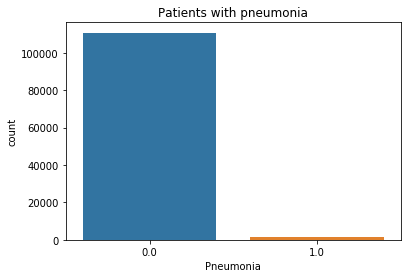

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9935d8080>,
      dtype=object)

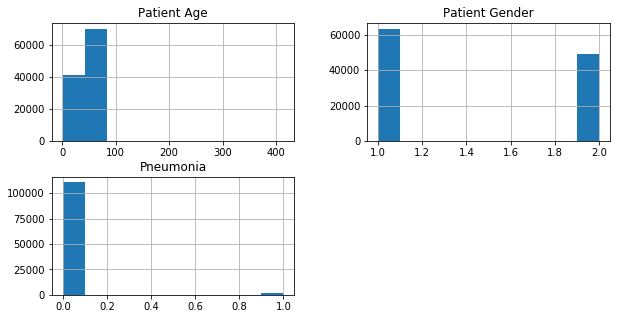

In [10]:
import pandas as pd
all_xray_df = pd.read_csv('/floyd/input/cxrfile/Data_Entry_2017.csv')

# extract basename of image file from the path -  we used imagefile
all_image_paths = {os.path.basename(x): x for x in imagefile}

# read dataset
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])

# Create new variable named path in the dataset - for all image index you get image path
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.sample(3) # sample print out
# Now all paths are loaded with corresponding image file names

# Here we removed no findings from label as empty -  we only care about findings
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', 'Normal'))


from itertools import chain
# Make an iterator that returns elements from the first iterable until it is exhausted,
# then proceeds to the next iterable
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist()) ))
all_labels # as array of unique findings

all_labels = [x for x in all_labels if len(x)>0]
all_labels # as list
# Printing list
print('All Labels ({}): {}'.format(len(all_labels), all_labels))

# for loop iterated through unique 14 findings and create binary class for each finding as variable
for i in all_labels:
    print(i)
    if len(i)>1: # leave out empty labels
        all_xray_df[i] = all_xray_df['Finding Labels'].map(lambda x: 1.0 if i in x else 0)

all_xray_df.sample(3)

d1 = all_xray_df
import seaborn as sns

sns.countplot(x='Pneumonia',data=all_xray_df)
plt.title('Patients with pneumonia')
plt.show()

# Look we only have a few patients with pneumonia

# creating a dict file for gender
gender = {'M': 1,'F': 2} 
  
# traversing through dataframe Gender column and writing values where key matches 
d1['Patient Gender'] = [gender[item] for item in d1['Patient Gender']] 

d1[['Patient Age','Patient Gender', 'Pneumonia']].hist(figsize = (10, 5))

2145
0.0    4290
1.0    1431
Name: Pneumonia, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd993645160>]],
      dtype=object)

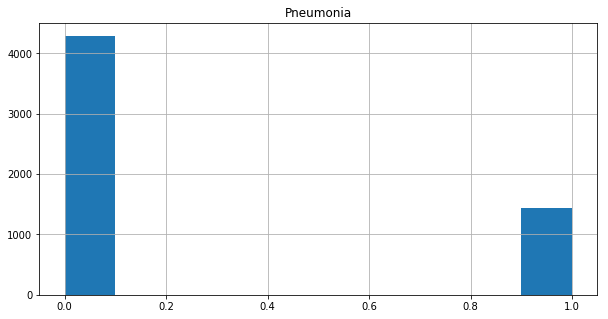

In [11]:
positive_cases = np.sum(d1['Pneumonia']==True)//2
oversample_factor = 3 # maximum number of cases in negative group so it isn't super rare
k = oversample_factor*positive_cases
print(k)
more_balanced_df = d1.groupby(['Patient Gender','Pneumonia']).apply(lambda x: x.sample(min(oversample_factor*positive_cases, x.shape[0]), 
                                                                                   replace = False)).reset_index(drop = True)

print(more_balanced_df['Pneumonia'].value_counts())
more_balanced_df[[ 'Pneumonia']].hist(figsize = (10, 5))

In [12]:
from sklearn.model_selection import train_test_split

raw_train_df, test_valid_df = train_test_split(more_balanced_df, test_size = 0.30, random_state = None,
                                   stratify = more_balanced_df[['Pneumonia', 'Patient Gender']])

valid_df, test_df = train_test_split(test_valid_df, 
                                   test_size = 0.40, 
                                   random_state = None,
                                   stratify = test_valid_df[['Pneumonia', 'Patient Gender']])

print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0], 'test', test_df.shape[0])
print('train\n', raw_train_df['Pneumonia'].value_counts())
print('Valid\n', valid_df['Pneumonia'].value_counts())
print('test\n', test_df['Pneumonia'].value_counts())
raw_train_df.sample(1)

train 4004 validation 1030 test 687
train
 0.0    3002
1.0    1002
Name: Pneumonia, dtype: int64
Valid
 0.0    772
1.0    258
Name: Pneumonia, dtype: int64
test
 0.0    516
1.0    171
Name: Pneumonia, dtype: int64


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Normal,Pleural_Thickening,Pneumonia,Pneumothorax
303,00002975_000.png,Normal,0,2975,17,1,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


New Data Size: 4000 Old Size: 4004


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd994155d30>,
      dtype=object)

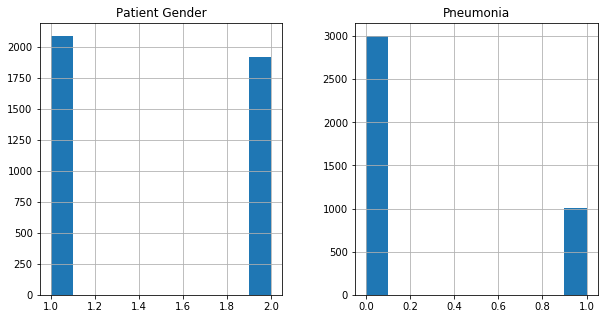

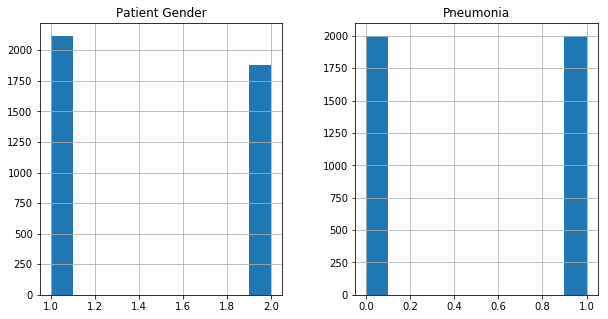

In [13]:
raw_train_df[['Pneumonia', 'Patient Gender']].hist(figsize = (10, 5))

#Sampling with replacement
train_df = raw_train_df.groupby(['Pneumonia']).apply(lambda x: x.sample(2000, replace = True)).reset_index(drop = True)

print('New Data Size:', train_df.shape[0], 'Old Size:', raw_train_df.shape[0])

train_df[['Pneumonia', 'Patient Gender']].hist(figsize = (10, 5))

In [14]:
from IPython.display import Image, display
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16 as PTModel, preprocess_input

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

from PIL import Image
IMG_SIZE = (512, 512) # slightly smaller than vgg16 normally expects

core_idg = ImageDataGenerator(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip=False, 
                              vertical_flip=False, 
                              height_shift_range=0.1, 
                              width_shift_range=0.1, 
                              brightness_range=[0.7, 1.5],
                              rotation_range=3, 
                              shear_range=0.01,
                              fill_mode='nearest',
                              zoom_range=0.125,
                             preprocessing_function=preprocess_input)


In [15]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir,class_mode = 'sparse', **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [16]:

train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'path',
                            y_col = 'Pneumonia', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32)

valid_gen = flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'path',
                            y_col = 'Pneumonia', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32) # we can use much larger batches for evaluation
# used a fixed dataset for evaluating the algorithm

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 4000 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1030 images


In [17]:
test_X, test_Y = next(flow_from_dataframe(core_idg, 
                               valid_df, 
                             path_col = 'path',
                            y_col = 'Cardiomegaly', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32)) # one big batch
# used a fixed dataset for final evaluation
final_test_X, final_test_Y = next(flow_from_dataframe(core_idg, 
                               test_df, 
                             path_col = 'path',
                            y_col = 'Cardiomegaly', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32)) # one big batch

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1030 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 687 images


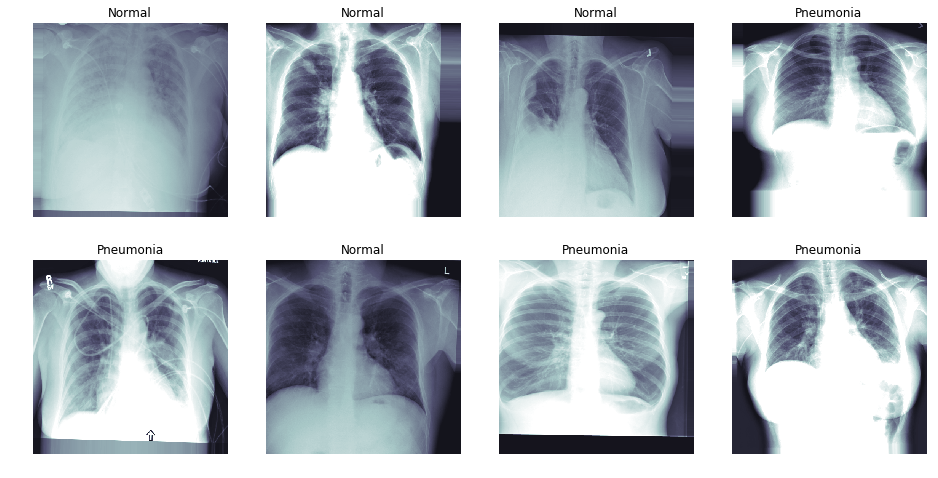

In [18]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -127, vmax = 127)
    c_ax.set_title('%s' % ('Pneumonia' if c_y>0.5 else 'Normal'))
    c_ax.axis('off')

In [19]:
base_pretrained_model = PTModel(input_shape =  t_x.shape[1:], 
                              include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False

58892288/58889256 [==============================] - 3s 0us/step


In [20]:
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda, AvgPool2D
from keras.models import Model
pt_features = Input(base_pretrained_model.get_output_shape_at(0)[1:], name = 'feature_input')
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

# here we do an attention mechanism to turn pixels in the GAP on an off
attn_layer = Conv2D(128, kernel_size = (1,1), padding = 'same', activation = 'elu')(bn_features)
attn_layer = Conv2D(32, kernel_size = (1,1), padding = 'same', activation = 'elu')(attn_layer)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'elu')(attn_layer)
attn_layer = AvgPool2D((2,2), strides = (1,1), padding = 'same')(attn_layer) # smooth results
attn_layer = Conv2D(1,kernel_size = (1,1), padding = 'valid', activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.5)(Dense(128, activation = 'elu')(gap_dr))
out_layer = Dense(1, activation = 'sigmoid')(dr_steps)

attn_model = Model(inputs = [pt_features], outputs = [out_layer], name = 'attention_model')

attn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['binary_accuracy'])

attn_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
feature_input (InputLayer)      (None, 16, 16, 512)  0                                            
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, 16, 16, 512)  2048        feature_input[0][0]              
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, 16, 16, 128)  65664       batch_normalization_283[0][0]    
__________________________________________________________________________________________________
conv2d_284 (Conv2D)             (None, 16, 16, 32)   4128        conv2d_283[0][0]                 
__________________________________________________________________________________________________
conv2d_285

In [21]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path="{}_weights.best.hdf5".format('Pna_attn')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss",mode="min",patience=10) 
# probably needs to be more patient, but time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

/usr/local/lib/python3.6/site-packages/keras/callbacks.py:928: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` insted.
  warnings.warn('`epsilon` argument is deprecated and '


In [22]:
from keras.models import Sequential
from keras.optimizers import Adam
tb_model = Sequential(name = 'combined_model')
base_pretrained_model.trainable = False
tb_model.add(base_pretrained_model)
tb_model.add(attn_model)
tb_model.compile(optimizer = Adam(lr = 1e-3), loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])
tb_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 16, 16, 512)       14714688  
_________________________________________________________________
attention_model (Model)      (None, 1)                 138690    
Total params: 14,853,378
Trainable params: 137,154
Non-trainable params: 14,716,224
_________________________________________________________________


In [ ]:
train_gen.batch_size = 124
tb_model.fit_generator(train_gen, steps_per_epoch=10000, epochs=6)

Epoch 1/6


In [ ]:
tb_model.load_weights(weight_path)

In [ ]:
# get the attention layer since it is the only one with a single output dim
for attn_layer in attn_model.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

In [ ]:
import keras.backend as K
rand_idx = np.random.choice(range(len(test_X)), size = 6)
attn_func = K.function(inputs = [attn_model.get_input_at(0), K.learning_phase()],
           outputs = [attn_layer.get_output_at(0)]
          )
fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = test_X[c_idx:(c_idx+1)]
    cur_features = base_pretrained_model.predict(cur_img)
    attn_img = attn_func([cur_features, 0])[0]
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
    real_label = test_Y[c_idx]
    img_ax.set_title('Pna\nClass:%s' % (real_label))
    pred_confidence = tb_model.predict(cur_img)[0]
    attn_ax.set_title('Attention Map\nPred:%2.1f%%' % (100*pred_confidence[0]))
fig.savefig('attention_map.png', dpi = 300)

In [ ]:
pred_Y = tb_model.predict(test_X, batch_size = 32, 
                          verbose = True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
plt.matshow(confusion_matrix(test_Y, pred_Y>0.5))
print(classification_report(test_Y, pred_Y>0.5, target_names = ['Healthy', 'Pneumonia']))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(test_Y, pred_Y)
fig, ax1 = plt.subplots(1,1, figsize = (5, 5), dpi = 250)
ax1.plot(fpr, tpr, 'b.-', label = 'VGG-Model (AUC:%2.2f)' % roc_auc_score(test_Y, pred_Y))
ax1.plot(fpr, fpr, 'k-', label = 'Random Guessing')
ax1.legend(loc = 4)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate');
fig.savefig('roc.pdf')